In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh1/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh1"])
#df1 = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh2/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh2"])
#df2 = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh3/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh3"])
df = pd.read_table('ParameterSetsW_Errors.csv',sep=',')

In [3]:
df.sample(5)

a1        a2        a3            a4            a5        a6   
149  0.589034  0.532366  0.743478  3.800000e+20  7.690000e+21  0.004944  \
321  0.451269  0.569774  4.149721  1.770525e+00  2.433541e-01  0.045762   
319  0.448057  0.608508  0.916452  4.380047e-01  1.163750e+00  0.013668   
305  0.400083  0.605584  1.286411  5.586112e-01  8.257012e-01  0.015279   
177  0.407467  0.635746  0.765935  5.078212e-01  3.234424e+04  0.007032   

           a7        n1        n2  t_half_Lead  v_max_Lead  t_half_Lagg   
149  0.003422  1.093002  1.029692    14.044885    1.287527    13.905501  \
321  0.052418  1.165695  1.505934    18.943893    1.362123    14.908235   
319  0.012834  1.127695  1.035023    16.659223    1.224436    11.547666   
305  0.015523  1.175823  1.155068    20.661084    1.387258    12.483265   
177  0.005114  1.166926  0.981860    20.036416    1.362346    11.017511   

     v_max_Lagg  LeadRecruitError  LaggRecruitError  CytoError   
149    1.204411          0.102488          0.189353   0.241297  \
321    1.376902          0.213267          0.153417   0.173299   
319    1.126654          0.230427          0.268854   0.319147   
305    1.200858          0.171550          0.068675   0.160166   
177    1.116237          0.163712          0.170909   0.217529   

     LeadRecoveryError  LaggRecoveryError  mmh  
149           1.527949           1.618819    2  
321           1.228019           1.051431    3  
319           1.659507           1.558079    3  
305           1.484668           1.048733    3  
177           1.498661           1.516861    2

In [4]:
df['n1-n2'] = df['n1'] - df['n2']

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   a1                 360 non-null    float64
 1   a2                 360 non-null    float64
 2   a3                 360 non-null    float64
 3   a4                 360 non-null    float64
 4   a5                 360 non-null    float64
 5   a6                 360 non-null    float64
 6   a7                 360 non-null    float64
 7   n1                 360 non-null    float64
 8   n2                 360 non-null    float64
 9   t_half_Lead        360 non-null    float64
 10  v_max_Lead         360 non-null    float64
 11  t_half_Lagg        360 non-null    float64
 12  v_max_Lagg         360 non-null    float64
 13  LeadRecruitError   360 non-null    float64
 14  LaggRecruitError   360 non-null    float64
 15  CytoError          360 non-null    float64
 16  LeadRecoveryError  360 non

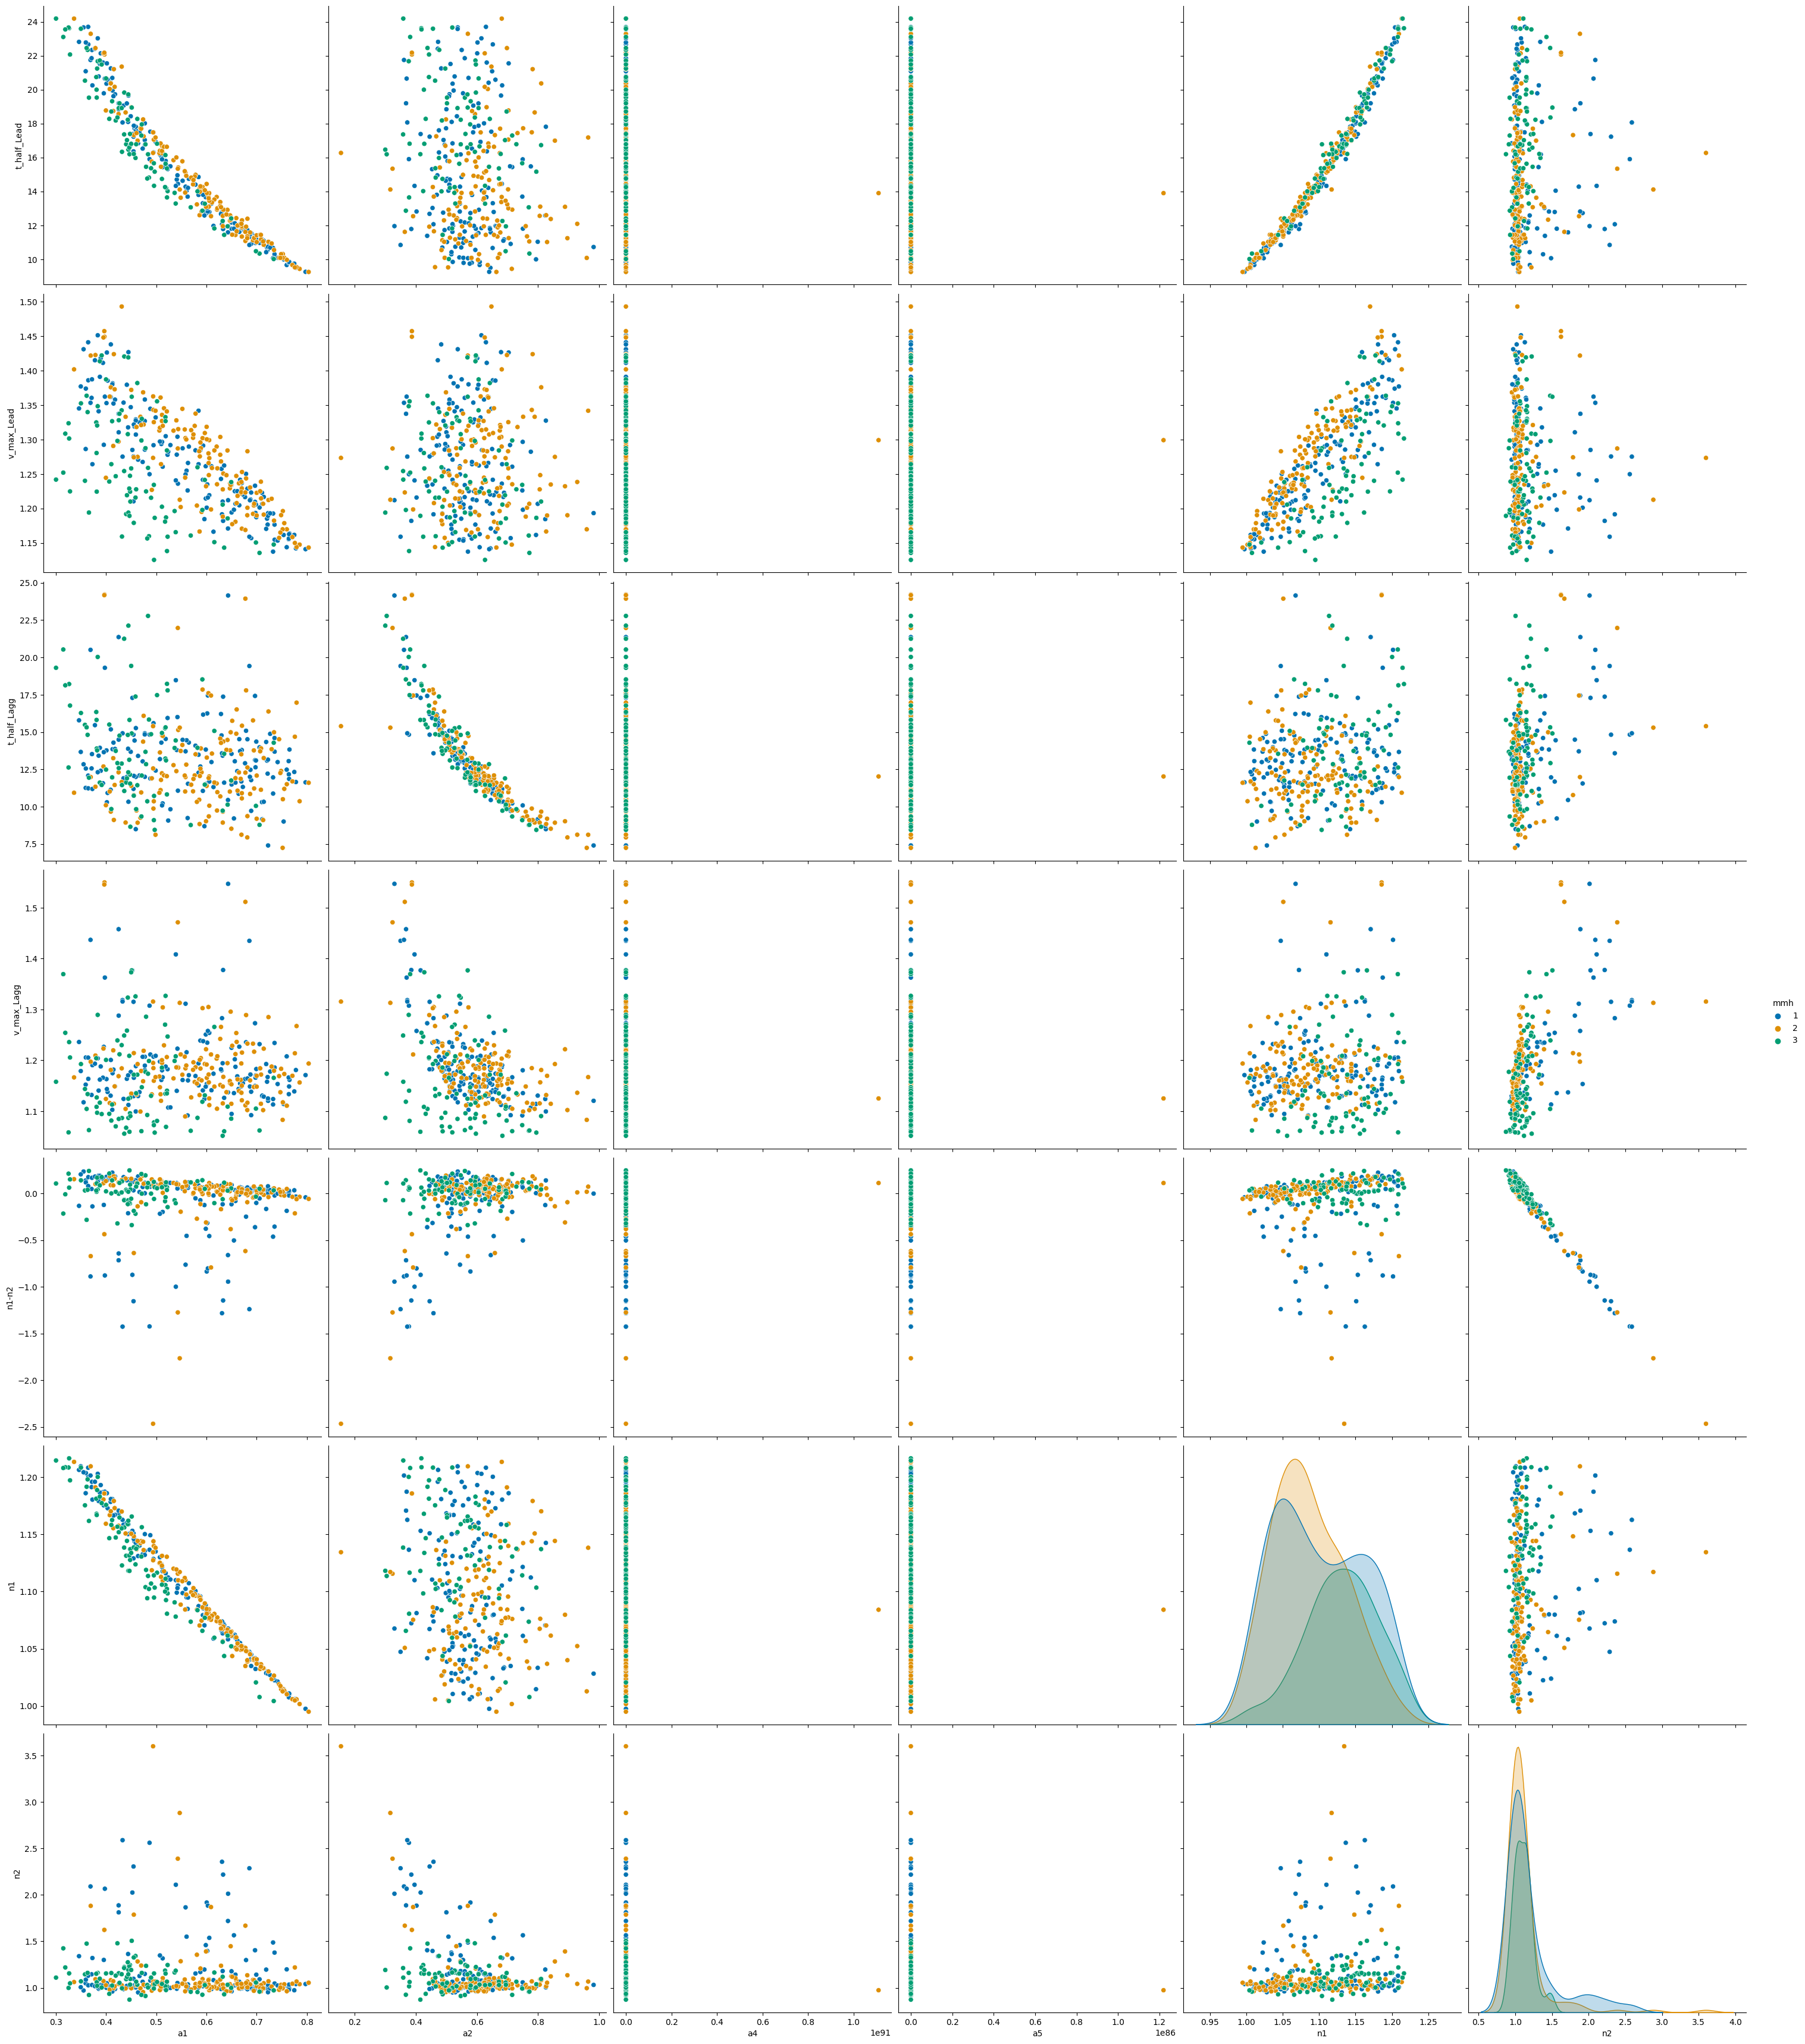

In [7]:
sns.pairplot(df, ## put the data frame here
                y_vars = ["t_half_Lead","v_max_Lead","t_half_Lagg","v_max_Lagg","n1-n2","n1","n2"], ## put a list of the desired vertical variables here
                x_vars = ["a1","a2","a4","a5","n1","n2"], ## put a list of the desired horizontal variables here
                height = 5,
                hue="mmh",palette="colorblind")

plt.show()

In [8]:
##count the number of each mmh1 type
df['mmh'].value_counts()

mmh
1    146
2    134
3     80
Name: count, dtype: int64

In [9]:
df['a4_log'] = df['a4'].apply(np.log10)
df['a5_log'] = df['a5'].apply(np.log10)

In [27]:
params_trimmed = df[df['a4'] <100]
params_trimmed = params_trimmed[params_trimmed['a3'] <100]
params_trimmed = params_trimmed[params_trimmed['a5'] <100]

In [28]:
params_trimmed.sample(5)

a1        a2         a3        a4        a5        a6        a7   
250  0.455459  0.658914  12.871163  0.798000  0.169000  0.025126  0.028000  \
70   0.359865  0.601964   1.013042  0.466988  1.886566  0.012710  0.012632   
91   0.596088  0.823805   2.071897  1.043347  0.491610  0.002935  0.000595   
348  0.443510  0.546916   1.772978  0.714947  0.440429  0.015797  0.015732   
288  0.470576  0.715506   0.772645  0.589007  2.101048  0.025435  0.027365   

           n1        n2  t_half_Lead  ...  v_max_Lagg  LeadRecruitError   
250  1.148341  1.787271    17.322837  ...    1.214344          0.064392  \
70   1.203767  1.087857    22.780085  ...    1.205669          0.105311   
91   1.070468  1.196763    12.587623  ...    1.124133          0.172168   
348  1.159013  1.275027    18.227238  ...    1.323377          0.187654   
288  1.130683  0.924323    17.295947  ...    1.060876          0.121762   

     LaggRecruitError  CytoError  LeadRecoveryError  LaggRecoveryError  mmh   
250          0.174134   0.277940           1.448323           1.270228    2  \
70           0.134130   0.141548           2.423706           1.031997    1   
91           0.166646   0.246321           1.440400           1.692744    1   
348          0.264088   0.236424           1.414195           0.868334    3   
288          0.339373   0.432084           1.299422           1.766728    3   

        n1-n2    a4_log    a5_log  
250 -0.638930 -0.097997 -0.772113  
70   0.115910 -0.330695  0.275672  
91  -0.126295  0.018429 -0.308380  
348 -0.116014 -0.145726 -0.356125  
288  0.206360 -0.229879  0.322436  

[5 rows x 22 columns]

In [29]:
params_trimmed['mmh'].value_counts()

mmh
3    80
1    57
2    38
Name: count, dtype: int64

In [30]:
params_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 359
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   a1                 175 non-null    float64
 1   a2                 175 non-null    float64
 2   a3                 175 non-null    float64
 3   a4                 175 non-null    float64
 4   a5                 175 non-null    float64
 5   a6                 175 non-null    float64
 6   a7                 175 non-null    float64
 7   n1                 175 non-null    float64
 8   n2                 175 non-null    float64
 9   t_half_Lead        175 non-null    float64
 10  v_max_Lead         175 non-null    float64
 11  t_half_Lagg        175 non-null    float64
 12  v_max_Lagg         175 non-null    float64
 13  LeadRecruitError   175 non-null    float64
 14  LaggRecruitError   175 non-null    float64
 15  CytoError          175 non-null    float64
 16  LeadRecoveryError  175 non-null

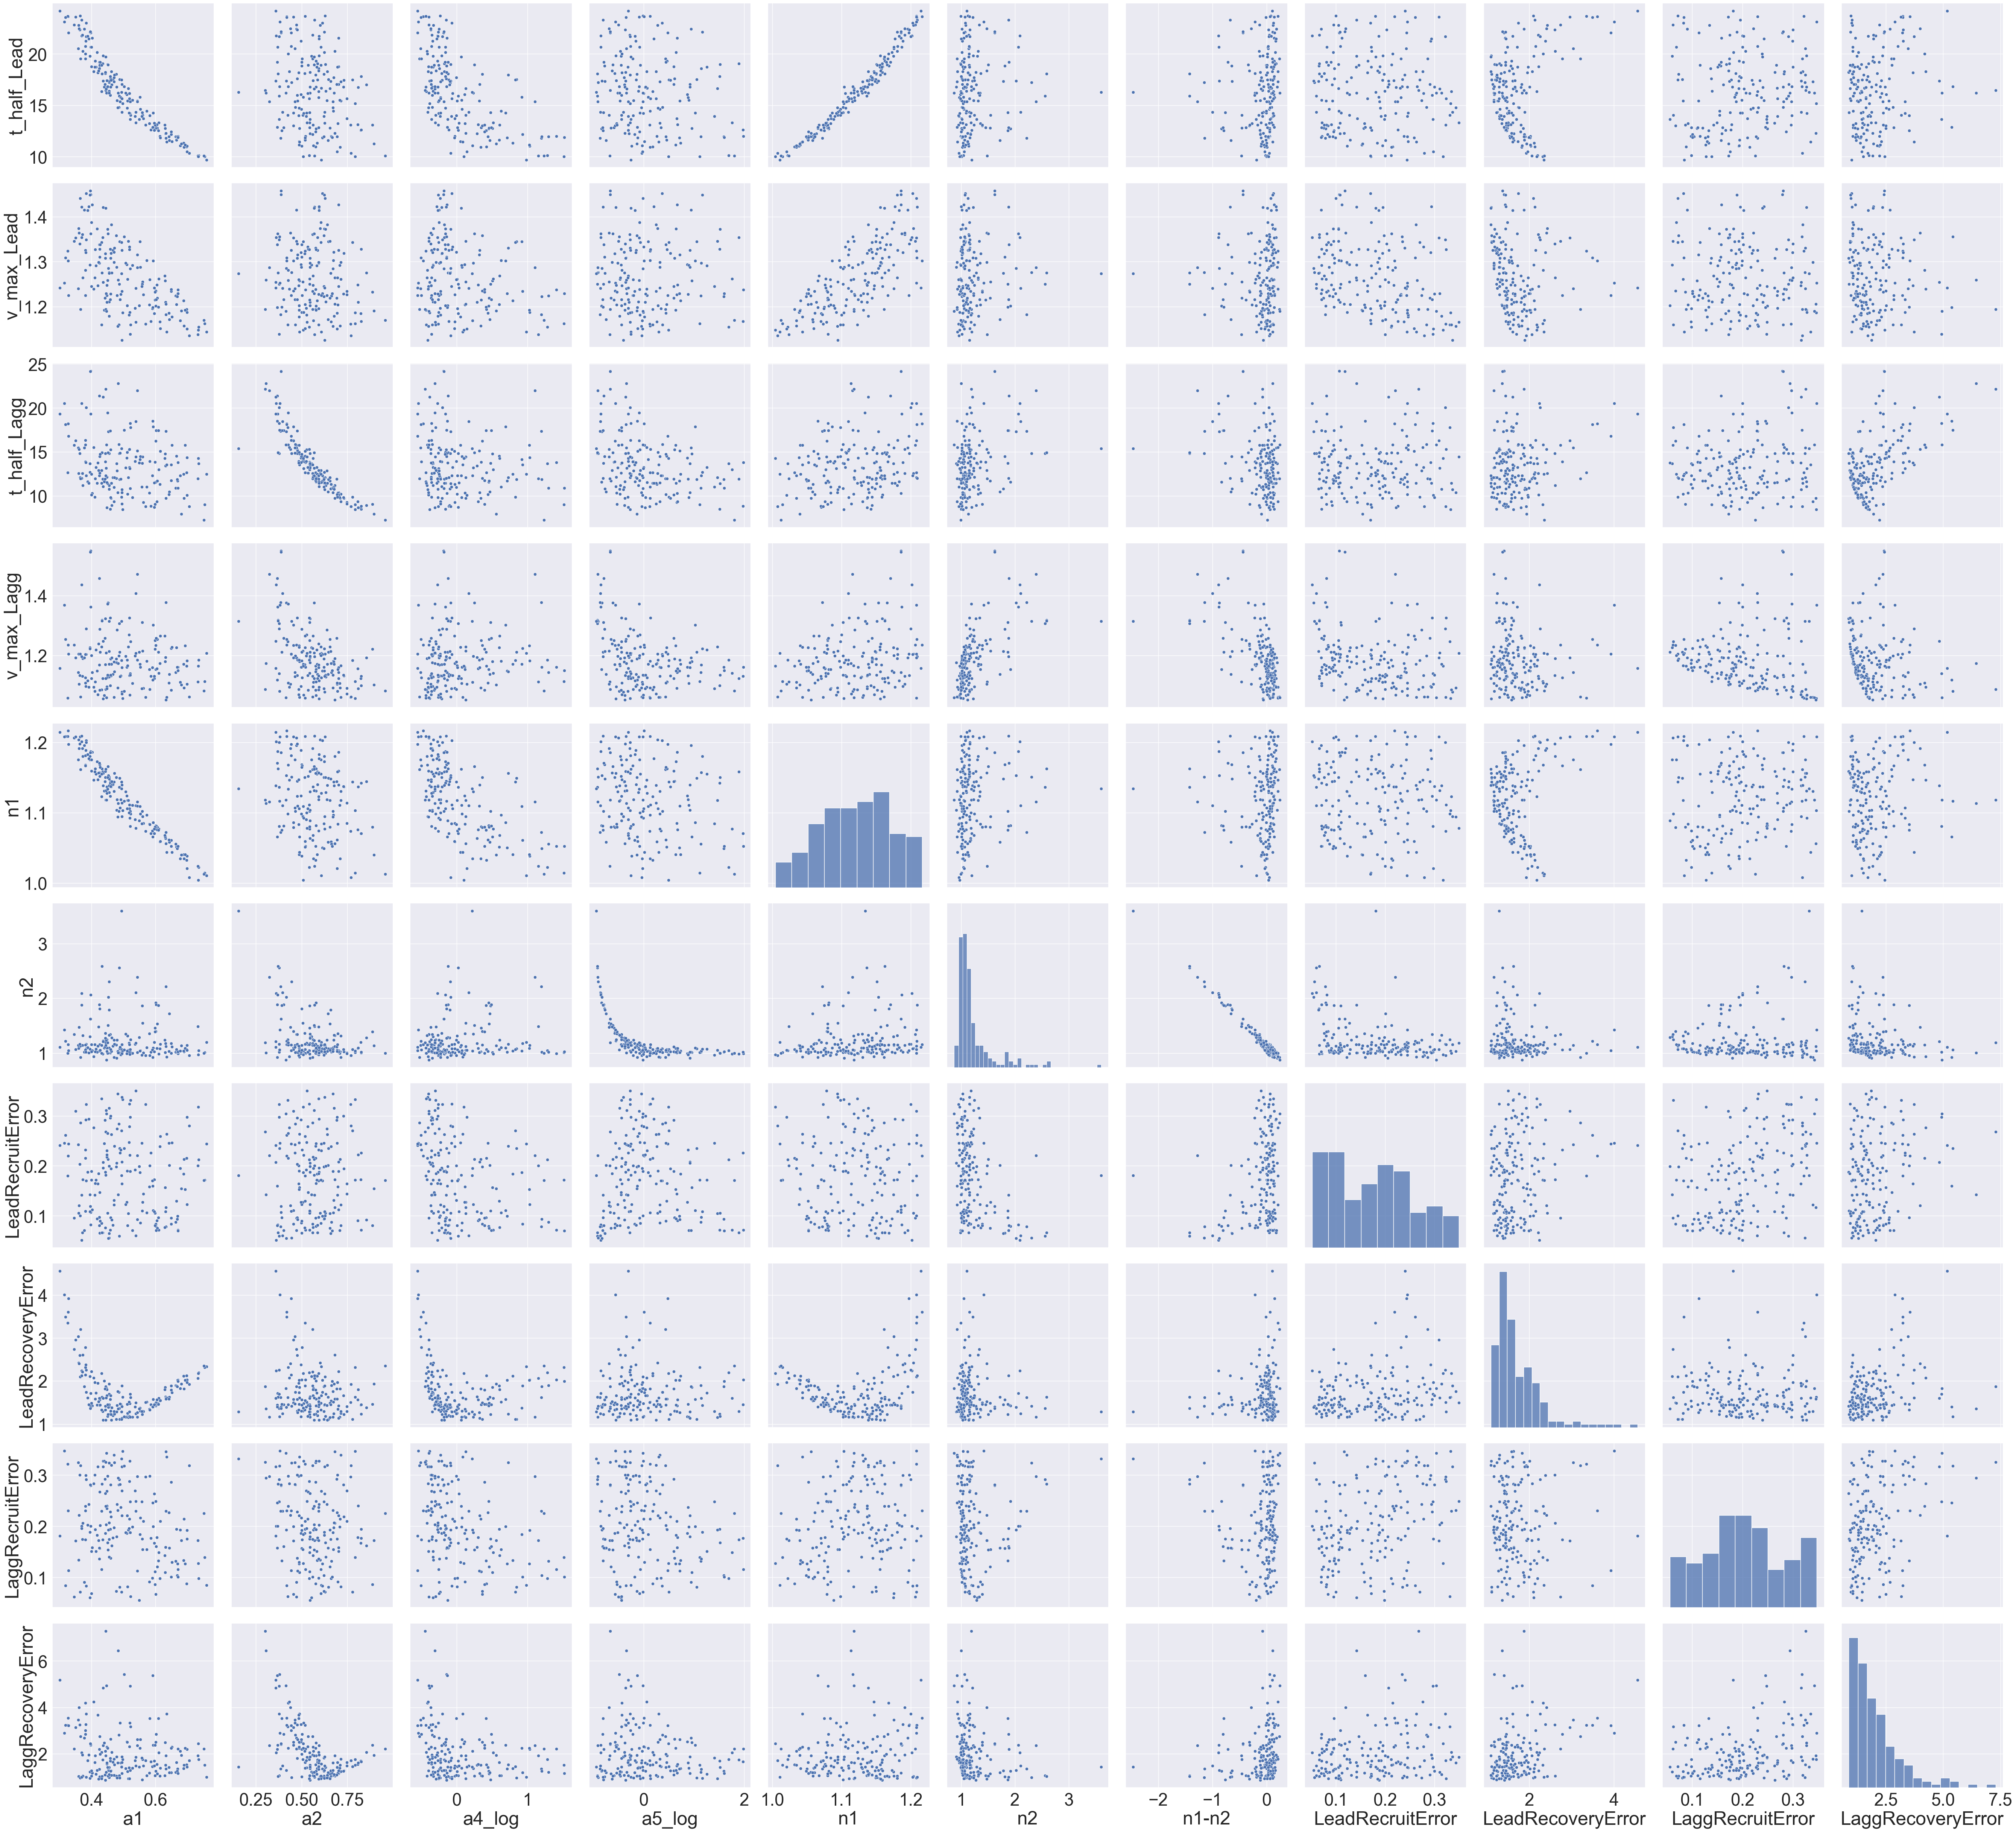

In [22]:
sns.pairplot(params_trimmed,
                y_vars = ["t_half_Lead","v_max_Lead","t_half_Lagg","v_max_Lagg","n1","n2","LeadRecruitError","LeadRecoveryError","LaggRecruitError","LaggRecoveryError"],
                x_vars = ["a1","a2","a4_log","a5_log","n1","n2","n1-n2","LeadRecruitError","LeadRecoveryError","LaggRecruitError","LaggRecoveryError"],
                height = 5)
sns.set(font_scale=3)

plt.show()

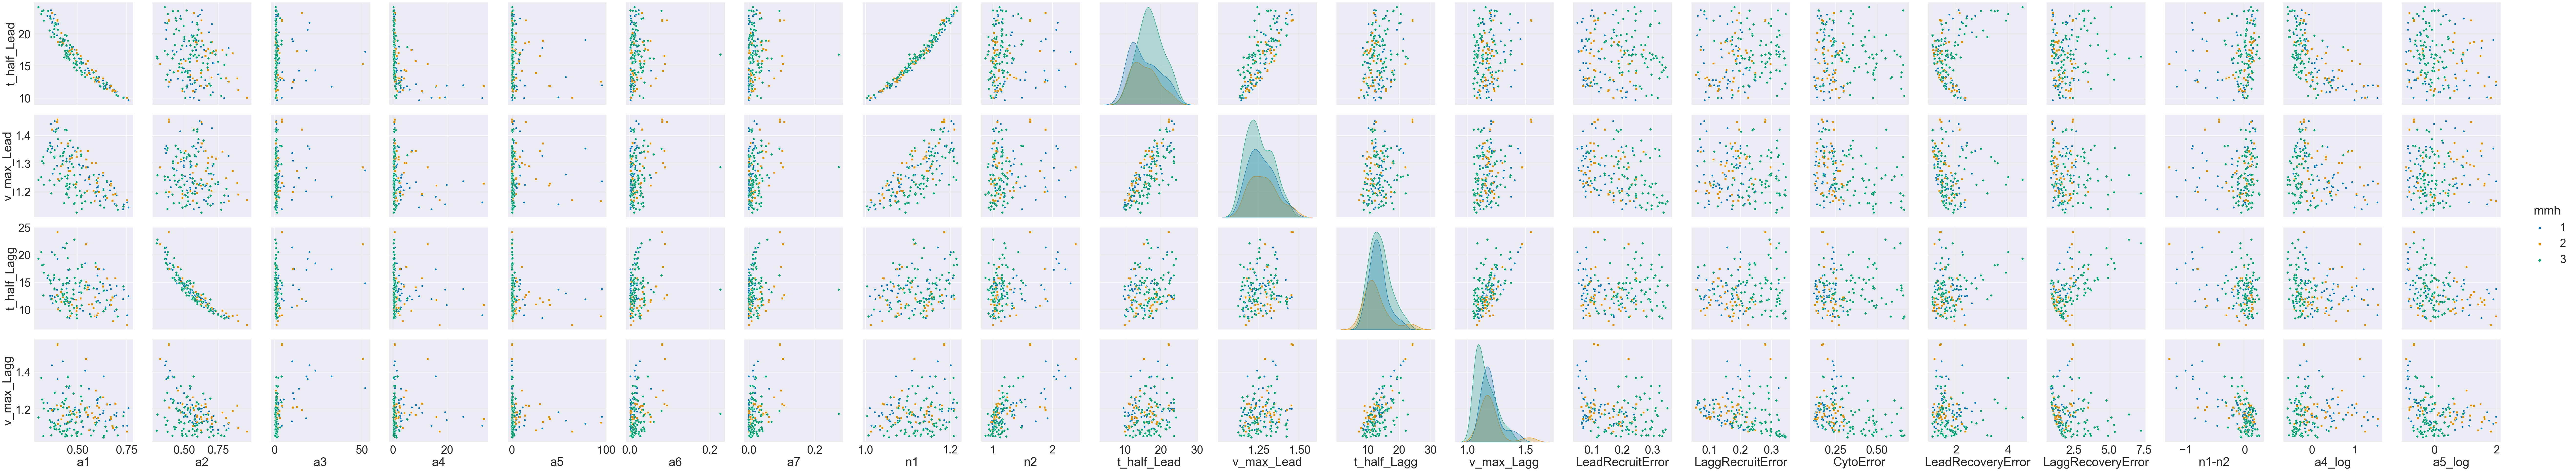

In [34]:
sns.pairplot(params_trimmed, ## put the data frame here
                y_vars = ["t_half_Lead","v_max_Lead","t_half_Lagg","v_max_Lagg"], ## put a list of the desired vertical variables here
                #x_vars = ["a1","a2","a4_log","a5_log","n1","n2"], ## put a list of the desired horizontal variables here
                height = 5,
                #kind="reg",                
                hue="mmh", palette="colorblind",
                markers=["o", "s", "D"])
sns.set(font_scale=3)
plt.show()